<a href="https://colab.research.google.com/github/Ohsoo46/AIFFEL_QUEST/blob/main/Statisticsday01_23_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

### 일표본 t검정

어떤 과자 공장에서 생산하는 A 과자의 중량은 평균 150g으로 알려져 있습니다. 품질 관리팀에서 최근 생산된 과자 30개를 무작위로 뽑아 무게를 측정했습니다. 과연 이 샘플의 평균 무게는 기존에 알려진 모평균 150g과 통계적으로 같다고 할 수 있을까요?

In [ ]:
# 모평균 설정
population_mean = 150

# 30개 과자 샘플의 무게 데이터
sample_data = [149.21, 151.59, 154.61, 149.04, 156.86,
               153.50, 155.22, 156.96, 148.39, 148.92,
               146.41, 155.81, 148.94, 150.27, 152.18,
               154.33, 155.64, 152.15, 150.54, 161.65,
               150.28, 141.55, 146.31, 153.71, 161.13,
               159.25, 145.71, 150.13, 151.87, 144.00]

In [ ]:
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
n = len(sample_data)
df = n - 1

print(f"가설 모평균 (μ₀): {population_mean}g")
print(f'측정된 과자 샘플의 평균 무게: {sample_mean:.2f}g')

가설 모평균 (μ₀): 150g
측정된 과자 샘플의 평균 무게: 151.87g


In [ ]:
# 표준 오차 (Standard Error of the Mean, s / √n)
standard_error = sample_std / np.sqrt(n)
# t-통계량 공식 적용
t_statistic_manual = (sample_mean - population_mean) / standard_error

print(f"표준 오차 (SEM): {standard_error:.4f}")
print(f"t-통계량 (직접 계산): {t_statistic_manual:.4f}")

표준 오차 (SEM): 0.8769
t-통계량 (직접 계산): 2.1348


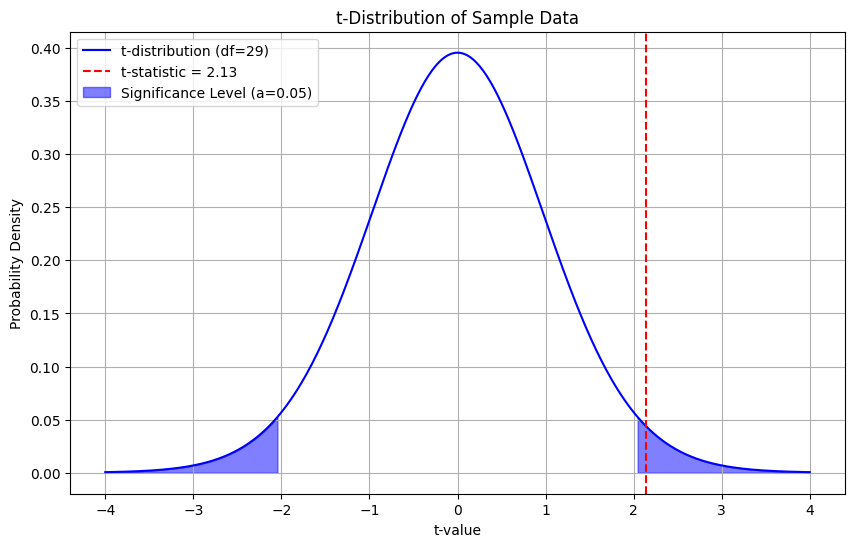

In [ ]:
# t-분포 그래프를 위한 데이터 생성
# -4에서 4까지의 범위를 400개로 나눔
x = np.linspace(-4, 4, 400)
# 해당 x값에 대한 t-분포의 확률 밀도 함수(PDF) 값 계산
y = stats.t.pdf(x, df)

# 그래프 그리기
plt.figure(figsize=(10, 6))
# t-분포 곡선 그리기
plt.plot(x, y, 'b-', label=f't-distribution (df={df})')
# t-통계량 위치에 수직선 그리기
plt.axvline(x=t_statistic_manual, color='r', linestyle='--', label=f't-statistic = {t_statistic_manual:.2f}')

# 유의수준 0.05 기각역 표시
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)

x_fill_right = np.linspace(t_critical, 4, 100)
y_fill_right = stats.t.pdf(x_fill_right, df)
plt.fill_between(x_fill_right, y_fill_right, color='blue', alpha=0.5, label=f'Significance Level (a={alpha})')

x_fill_left = np.linspace(-4, -t_critical, 100)
y_fill_left = stats.t.pdf(x_fill_left, df)
plt.fill_between(x_fill_left, y_fill_left, color='blue', alpha=0.5)

plt.title('t-Distribution of Sample Data')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

In [ ]:
# stats.t.sf() (Survival Function)는 1 - CDF 값으로, t-분포의 꼬리 한쪽 넓이를 계산합니다.
# 양측 검정이므로, 꼬리 넓이에 2를 곱해줍니다.
p_value_manual = stats.t.sf(np.abs(t_statistic_manual), df=df) * 2

print("--- p-값 계산 과정 ---")
print(f"p-값 (직접 계산): {p_value_manual:.4f}")

--- p-값 계산 과정 ---
p-값 (직접 계산): 0.0414


In [ ]:
alpha = 0.05
print(f"유의수준: {alpha}")
if p_value_manual < alpha:
    print(">> 결론: 귀무가설을 기각합니다. 샘플의 평균은 모평균과 유의미한 차이가 있습니다.")
else:
    print(">> 결론: 귀무가설을 기각할 수 없습니다.")

유의수준: 0.05
>> 결론: 귀무가설을 기각합니다. 샘플의 평균은 모평균과 유의미한 차이가 있습니다.


Scipy 라이브러리 사용해서 구현하기  
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

In [ ]:
t_statistic, p_value = stats.ttest_1samp(a=sample_data, popmean=population_mean)

print("--- 일표본 t-검정 결과 ---")
print(f"t-통계량 (t-statistic): {t_statistic:.4f}")
print(f"p-값 (p-value): {p_value:.4f}")

--- 일표본 t-검정 결과 ---
t-통계량 (t-statistic): 2.1348
p-값 (p-value): 0.0414


### 이표본 t검정

한 교육 연구원이 새로 개발한 수학 교육 방법(B)이 기존 교육 방법(A)보다 효과적인지 알아보고자 합니다. 이를 위해 50명의 학생을 무작위로 두 그룹(각 25명)으로 나누어, 한 그룹은 A 방식으로, 다른 그룹은 B 방식으로 교육한 후 시험을 치렀습니다. 과연 두 교육 방식 간에 시험 성적의 평균 차이가 통계적으로 유의미할까요?

In [ ]:
# 데이터 준비
group_a = np.array([85, 87, 92, 78, 83, 89, 91, 86, 84, 88, 90, 82, 87, 89, 85])
group_b = np.array([78, 81, 85, 74, 79, 83, 86, 80, 77, 82, 84, 76, 81, 83, 79])

In [ ]:
# 각 그룹의 표본 통계량 계산
mean_a = np.mean(group_a)
var_a = np.var(group_a, ddof=1)
n_a = len(group_a)

mean_b = np.mean(group_b)
var_b = np.var(group_b, ddof=1)
n_b = len(group_b)

print(f"그룹 A: Mean={mean_a:.2f}, Var={var_a:.2f}, n={n_a}")
print(f"그룹 B: Mean={mean_b:.2f}, Var={var_b:.2f}, n={n_b}")

그룹 A: Mean=86.40, Var=13.83, n=15
그룹 B: Mean=80.53, Var=11.70, n=15


In [ ]:
pooled_variance = ((n_a - 1) * var_a + (n_b - 1) * var_b) / (n_a + n_b - 2)
pooled_std = np.sqrt(pooled_variance)

t_statistic_manual = (mean_a - mean_b) / (pooled_std * np.sqrt(1/n_a + 1/n_b))

print(f"합동 분산 (Pooled Variance): {pooled_variance:.4f}")
print(f"t-통계량 (직접 계산): {t_statistic_manual:.4f}")

합동 분산 (Pooled Variance): 12.7619
t-통계량 (직접 계산): 4.4974


In [ ]:
degrees_of_freedom = n_a + n_b - 2
p_value_manual = stats.t.sf(np.abs(t_statistic_manual), df=degrees_of_freedom) * 2

print(f"자유도 (df): {degrees_of_freedom}")
print(f"p-값 (직접 계산): {p_value_manual:.4f}")

자유도 (df): 28
p-값 (직접 계산): 0.0001


SciPy 라이브러리 사용해서 구현하기  
[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)

In [ ]:
t_stat_lib, p_val_lib = stats.ttest_ind(group_a, group_b, equal_var=True)

print("--- SciPy 라이브러리 검증 결과 (Student's t-test) ---")
print(f"t-통계량 (라이브러리): {t_stat_lib:.4f}")
print(f"p-값 (라이브러리): {p_val_lib:.4f}")

--- SciPy 라이브러리 검증 결과 (Student's t-test) ---
t-통계량 (라이브러리): 4.4974
p-값 (라이브러리): 0.0001


### ANOVA 분산분석
한 농업 연구원이 새로 개발한 두 종류의 비료(B, C)가 식물 성장에 미치는 영향을 알아보고자 합니다. 비료를 주지 않은 통제 집단(A)을 포함하여 세 집단의 식물 키를 측정했습니다. 과연 세 집단의 평균 키에는 통계적으로 유의미한 차이가 있을까요?

In [ ]:
group_a = np.random.normal(20, 5, 20) # 통제 집단 (평균 20)
group_b = np.random.normal(28, 5, 20) # 비료 B (평균 28)
group_c = np.random.normal(25, 5, 20) # 비료 C (평균 25)

groups = [group_a, group_b, group_c]

In [ ]:
# 전체 데이터와 전체 평균(grand mean)
all_data = np.concatenate(groups)
grand_mean = np.mean(all_data)
N = len(all_data) # 전체 샘플 수
k = len(groups)   # 집단 수

In [ ]:
# --- 3. SSB (집단 간 제곱합) 계산 ---
ssb = sum([len(g) * (np.mean(g) - grand_mean)**2 for g in groups])

# --- 4. SSW (집단 내 제곱합) 계산 ---
ssw = sum([np.var(g, ddof=0) * len(g) for g in groups])

print(f"집단 간 제곱합 (SSB): {ssb:.4f}")
print(f"집단 내 제곱합 (SSW): {ssw:.4f}")

집단 간 제곱합 (SSB): 649.7978
집단 내 제곱합 (SSW): 1127.8760


In [ ]:
df_between = k - 1
df_within = N - k

msb = ssb / df_between
msw = ssw / df_within

f_stat_manual = msb / msw

print(f"집단 간 자유도 (df_between): {df_between}")
print(f"집단 내 자유도 (df_within): {df_within}")
print(f"F-통계량 (직접 계산): {f_stat_manual:.4f}")

집단 간 자유도 (df_between): 2
집단 내 자유도 (df_within): 57
F-통계량 (직접 계산): 12.9478


In [ ]:
p_value_manual = stats.f.sf(f_stat_manual, df_between, df_within)
print(f"p-값 (직접 계산): {p_value_manual:.4f}")

p-값 (직접 계산): 0.0000


Scipy 라이브러리 사용해서 구현하기  
[scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

In [ ]:
f_stat_lib, p_val_lib = stats.f_oneway(group_a, group_b, group_c)

print("\n--- SciPy 라이브러리 검증 결과 ---")
print(f"F-통계량 (라이브러리): {f_stat_lib:.4f}")
print(f"p-값 (라이브러리): {p_val_lib:.4f}")


--- SciPy 라이브러리 검증 결과 ---
F-통계량 (라이브러리): 12.9478
p-값 (라이브러리): 0.0000


사후 분석하기  
tukey' HSD는 [statsmodels](https://www.statsmodels.org/stable/index.html) 라이브러리에서 지원합니다

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
all_data = np.concatenate([group_a, group_b, group_c])
group_labels = ['A'] * 20 + ['B'] * 20 + ['C'] * 20

df = pd.DataFrame({'value': all_data, 'group': group_labels})

# ---  Tukey's HSD 사후 분석 수행 ---
# pairwise_tukeyhsd(endog=종속변수, groups=그룹변수, alpha=유의수준)
tukey_result = pairwise_tukeyhsd(endog=df['value'], groups=df['group'], alpha=0.05)

print("--- Tukey's HSD 사후 분석 결과 ---")
print(tukey_result)

--- Tukey's HSD 사후 분석 결과 ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   7.0431    0.0  3.5102 10.576   True
     A      C   5.6796 0.0008  2.1467 9.2125   True
     B      C  -1.3635 0.6245 -4.8964 2.1694  False
---------------------------------------------------


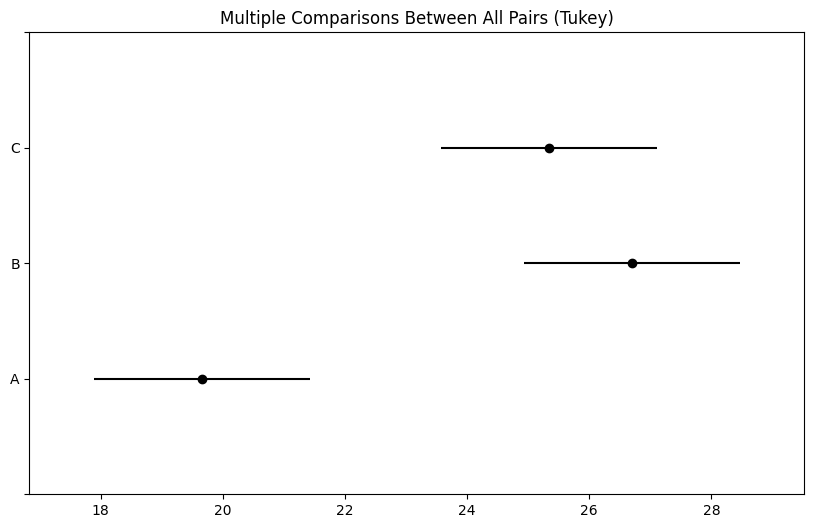

In [ ]:
tukey_result.plot_simultaneous()
plt.show()

### 카이제곱 독립성 검정

한 미디어 연구원이 학력 수준('고졸', '대졸', '대학원졸')과 주로 이용하는 뉴스 매체('TV', '신문', '온라인') 사이에 연관성이 있는지 알아보고자 합니다. 300명을 대상으로 설문조사를 하여 다음과 같은 **분할표(Contingency Table)**를 얻었습니다.

|학력 수준|	TV|	신문|	온라인|
|----|---|---|---|
|고졸|	30|	25|	20|  
|대졸|	25|	35|	60|
|대학원졸|	10|	20|	75|

In [ ]:
observed_data = pd.DataFrame({
    'TV': [30, 25, 10],
    'Newspaper': [25, 35, 20],
    'Online': [20, 60, 75]
}, index=['High School', 'College', 'Graduate'])

print("--- 관측 빈도표 (Observed Frequencies) ---")
print(observed_data)

--- 관측 빈도표 (Observed Frequencies) ---
             TV  Newspaper  Online
High School  30         25      20
College      25         35      60
Graduate     10         20      75


In [ ]:
# 연산하기 쉽도록 narray 형식으로 변경
observed = np.array(observed_data)

# ---  기대 빈도(Expected Frequency) 직접 계산 ---
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
grand_total = observed.sum()

expected = np.outer(row_totals, col_totals) / grand_total

In [ ]:
print("--- 기대 빈도표 (직접 계산) ---")
print(pd.DataFrame(expected,
                   index=['High School', 'College', 'Graduate'],
                   columns=['TV', 'Newspaper', 'Online']).round(2))

--- 기대 빈도표 (직접 계산) ---
                TV  Newspaper  Online
High School  16.25       20.0   38.75
College      26.00       32.0   62.00
Graduate     22.75       28.0   54.25


In [ ]:
# (관측값 - 기대값)^2 / 기대값 을 모든 셀에 대해 더함
chi2_stat_manual = np.sum((observed - expected)**2 / expected)

print(f"\n카이제곱 통계량 (직접 계산): {chi2_stat_manual:.4f}")


카이제곱 통계량 (직접 계산): 39.7094


In [ ]:
# 자유도 (d.f.) = (행의 수 - 1) * (열의 수 - 1)
rows = observed.shape[0]
cols = observed.shape[1]
degrees_of_freedom = (rows - 1) * (cols - 1)

In [ ]:
p_value_manual = stats.chi2.sf(chi2_stat_manual, df=degrees_of_freedom)

print(f"자유도 (직접 계산): {degrees_of_freedom}")
print(f"p-값 (직접 계산): {p_value_manual:.4f}")

자유도 (직접 계산): 4
p-값 (직접 계산): 0.0000


Scipy 라이브러리 이용해서 사용해서 구현하기  
[scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency)

In [ ]:
# --- 2. SciPy를 이용한 카이제곱 검정 수행 ---
# chi2_contingency 함수는 관측 빈도표를 입력받습니다.
chi2_stat_lib, p_val_lib, df_lib, expected_lib = stats.chi2_contingency(observed_data)

print("\n--- SciPy 라이브러리 검증 결과 ---")
print(f"카이제곱 통계량 (χ²): {chi2_stat_lib:.4f}")
print(f"p-값 (p-value): {p_val_lib:.4f}")
print(f"자유도 (d.f.): {df_lib}")
print("\n--- 기대 빈도표 (Expected Frequencies) ---")
print(pd.DataFrame(expected_lib,
                   index=observed_data.index,
                   columns=observed_data.columns).round(2))


--- SciPy 라이브러리 검증 결과 ---
카이제곱 통계량 (χ²): 39.7094
p-값 (p-value): 0.0000
자유도 (d.f.): 4

--- 기대 빈도표 (Expected Frequencies) ---
                TV  Newspaper  Online
High School  16.25       20.0   38.75
College      26.00       32.0   62.00
Graduate     22.75       28.0   54.25


### 윌콕슨 순위합 검정(맨-휘트니 U 검정)

한 기업에서 두 가지 웹사이트 디자인(A, B)을 A/B 테스트한 후, 사용자들에게 만족도 점수(1~20점)를 받았습니다. 이 점수 데이터가 정규분포를 따른다고 확신할 수 없을 때, 두 디자인 간에 만족도 점수 분포에 차이가 있는지 맨-휘트니 U 검정으로 확인해 보겠습니다.

[scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)

In [ ]:
group_a = [7, 8, 9, 12, 15, 16, 17]
group_b = [1, 2, 3, 4, 5, 6, 10, 11]

u_stat_lib, p_val_lib = stats.mannwhitneyu(group_a, group_b, alternative='two-sided')

print("--- SciPy 라이브러리 검증 결과 ---")
print(f"U 통계량: {u_stat_lib:.4f}")
print(f"p-값 (p-value): {p_val_lib:.4f}")

alpha = 0.05
if p_val_lib < alpha:
    print("\n결론: 귀무가설을 기각합니다. 두 디자인의 만족도 점수 분포는 유의미하게 다릅니다.")
else:
    print("\n결론: 귀무가설을 기각할 수 없습니다.")

--- SciPy 라이브러리 검증 결과 ---
U 통계량: 50.0000
p-값 (p-value): 0.0093

결론: 귀무가설을 기각합니다. 두 디자인의 만족도 점수 분포는 유의미하게 다릅니다.
